[]

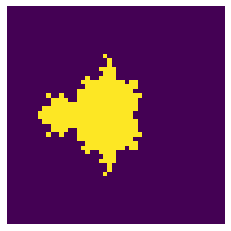

In [7]:
from functions import mandelbrot_set
import matplotlib.pyplot as plt
import numpy as np

def plot(set : np.array, cutoff=2):
    bounded = np.abs(set) < cutoff
    plt.imshow(bounded)
    plt.axis('off')
    plt.show()

plot(mandelbrot_set())